# Assignment: Dino Fun World Analysis Cont.
As in your previous assignments, the administrators of the Dino Fun World theme park have asked you, one of their data analysts, to perform a data analysis task in order to help them administer the park. In this case, your task builds upon one of the tasks the administrators previously asked you to perform. In a prior task, you were asked to find the distance between a set of visitor trajectories using a simple edit distance algorithm and report the distances. For this task, you must construct and display a dendrogram of those distances. Again, the administrators of the park have provided a database which contains the information needed.

### Provided Database

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkins', 'attractions', and 'sequences'. The information contained in each of these tables is listed below:

`checkins`:
    - Description: check-in data for all visitors for the day in the park. The data includes two types of check-ins, inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carussel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
    - Fields: visitorID, sequence
    
The database is named 'dinofunworld.db' and is available at readonly/dinofunworld.db.

### Questions to Answer

This tasks consists of only one question, which will require you to generate a dendrogram graph. Create this dendrogram using the trajectories of the visitors with the IDs: 165316, 1835254, 296394, 404385, and 448990. If you are unsure about how to create a dendrogram, please refer to the Jupyter Notebook example which covers creating a dendrogram. When performing clustering over the trajectories to inform the dendrogram, use an average distance over all points in the cluster.

#### Administrative Notes

This assignment will be graded by Coursera's grading system. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly. Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed.

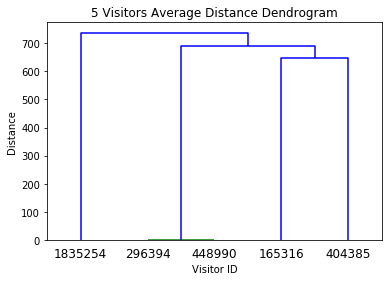

In [25]:
# Graded Cell, PartID:RLU7S
# Create and display a dendrogram of the trajectories of the 5 visitors specified above.
# The clustering algorithm used to create the dendrogram should use the average distance
# between points in a cluster.

import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten

conn = sqlite3.connect('readonly/dinofunworld.db')
c = conn.cursor()

c.execute("SELECT visitorID, sequence FROM sequences where visitorID IN (165316, 1835254, 296394, 404385, 448990);")
result = c.fetchall()
# print(result)
df=pd.DataFrame.from_records(result, columns=['visitorID','sequence'])
# print(df1)
df['seq_list']=df['sequence'].apply(lambda i: [int(x) for x in i.split('-') ])
# print(df)
np_mat=np.matrix(df['seq_list'].values.tolist())
# print(np_mat)
links=linkage(np_mat, 'average')
# print(links)
dendrogram(links, labels=df['visitorID'].values.tolist())
plt.title("5 Visitors Average Distance Dendrogram")
plt.xlabel("Visitor ID")
plt.ylabel("Distance")
plt.show()
